In [70]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler, PolynomialFeatures, FunctionTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import Ridge, SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import VarianceThreshold, SelectKBest, chi2, SelectFromModel
from joblib import dump
from sklearn.ensemble import RandomForestRegressor


In [71]:
df_voitures = pd.read_csv('dataset_voitures_cleaned copy.csv',index_col='car_ID')

In [72]:
df_voitures.dtypes

symboling             int64
fueltype             object
aspiration           object
doornumber            int64
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight          float64
enginetype           object
cylindernumber        int64
enginesize          float64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
price               float64
marque               object
modele               object
city L/100km        float64
highway L/100km     float64
dtype: object

In [73]:
X = df_voitures.drop(['price','peakrpm','modele','symboling','doornumber','compressionratio'],axis=1)
y = df_voitures['price']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

numeric_features = list(X.select_dtypes(include=['float64','int64']).columns)
categorical_features = list(X.select_dtypes(include=['object']).columns)

# selector = VarianceThreshold(threshold=0.2)



numeric_transformer = Pipeline([
    ('rob',RobustScaler()),
    # ('thre',selector)
])

categorical_transformer = OneHotEncoder(handle_unknown='ignore')
preprocessor = ColumnTransformer(
    transformers = [
        ('num',numeric_transformer,numeric_features),
        ('cat', categorical_transformer,categorical_features)
    ]
)

# param_grid= {'reg__alpha':[0.1,1, 10]} 

pipe = Pipeline([
    ('prep',preprocessor),
    # ('reg', FunctionTransformer(lambda x: x, validate=True))
])

# grid = GridSearchCV(pipe, param_grid, cv=5)

# grid.fit(X_train, y_train)
# regressor = grid.best_estimator_.named_steps['reg']


pipe_final = Pipeline([
    ('prep',preprocessor),
    # ('reg', regressor),
    ('rf', RandomForestRegressor())
])

trained_model = pipe_final.fit(X_train,y_train)
score = trained_model.score(X_test,y_test)
# print(f'meilleur parametre de Ridge : {grid.best_params_}')
print(score)

0.9581476449170552


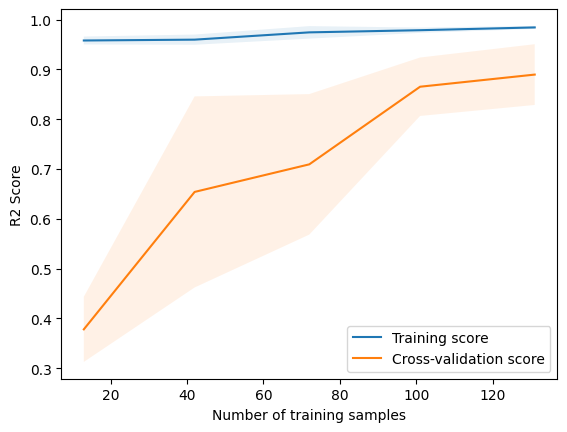

In [74]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    trained_model, X_train, y_train, cv=5, scoring='r2')

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, label='Training score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.plot(train_sizes, test_mean, label='Cross-validation score')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)

plt.xlabel('Number of training samples')
plt.ylabel('R2 Score')
plt.legend(loc='best')
plt.show()


In [75]:
# Sauvegarde du modèle 

dump(pipe_final,'model.joblib')

['model.joblib']